In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
# sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
import StructureFactor
from scipy import linalg as la
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/data/FS_plots/"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/data/FS_plots/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathMAC

0 2
temp of the structure factor 2
1 10
temp of the structure factor 10


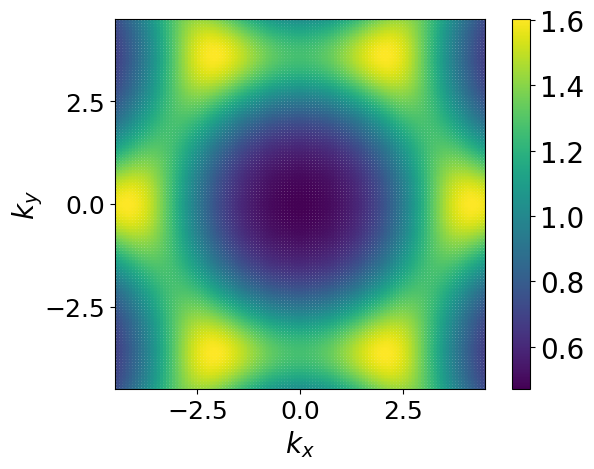

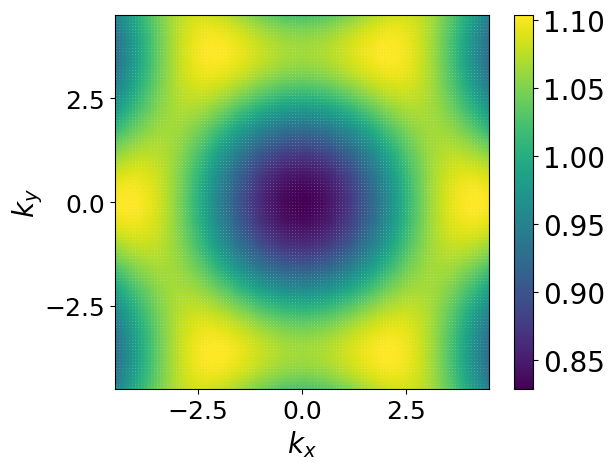

In [3]:
ST=[]

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
TTT=np.array([2,10])
for i,T in enumerate(TTT):
    print(i,T)
    fig,ax=plt.subplots(1,1)
    SS=StructureFactor.StructureFac_fit_F(T)
    im=ax.scatter(x,y,c=SS.Static_SF( x,y),s=4)
    ax.set_xlim([-4.5,4.5])
    ax.set_ylim([-4.5,4.5])
    ax.set_xlabel(r"$k_x$",size=20)
    ax.set_ylabel(r"$k_y$",size=20,labelpad=.0001)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=4)
    
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('imgs/static_T'+str(T)+'.png',dpi=400)

temp of the structure factor 1.0
temp of the structure factor 10.0


[Text(0.5, 0, '0.5'), Text(1.0, 0, '1')]

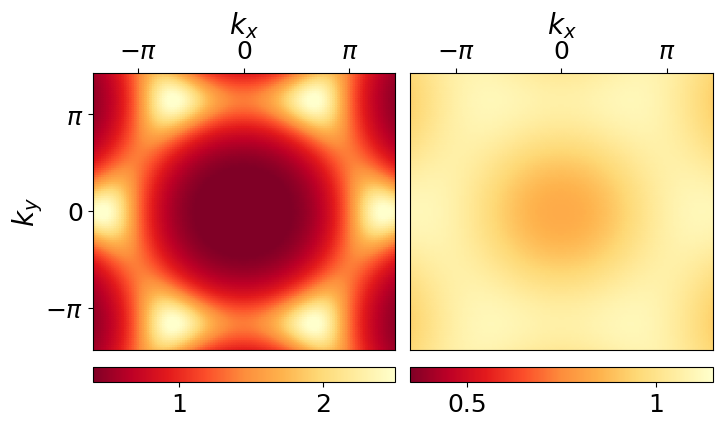

In [4]:
figure = plt.figure(figsize = (8, 4.5))
gs = figure.add_gridspec(1,2, wspace=.05)
axis = gs.subplots(sharey=True)

x1=np.linspace(-4.5,4.5,120)
x,y=np.meshgrid(x1,x1)
T=1.0
ind=0
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.4
vmax=2.5
im=axis[ind].scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis[ind].set_xlim([-4.5,4.5])
axis[ind].set_ylim([-4.5,4.5])
axis[ind].set_xlabel(r"$k_x$",size=20)
axis[ind].set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18)
axis[ind].locator_params(axis='y', nbins=4)
axis[ind].locator_params(axis='x', nbins=4)
axis[ind].xaxis.set_label_position("top")
axis[ind].xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis[ind].set_xticks(xtpos)
axis[ind].set_xticklabels(xt,size=18)
yt=[r"$-\pi$",0,r"$\pi$"]
ytpos=np.array([-np.pi,0,np.pi])
axis[ind].set_yticks(xtpos)
axis[ind].set_yticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.05, ticks=[1,2])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['1', '2'])  # vertically oriented colorbar

T=10.0
ind=1
SS=StructureFactor.StructureFac_fit_F(T)
vmin=0.35
vmax=1.15
im=axis[ind].scatter(x,y,c=SS.Static_SF( x,y),s=4, cmap='YlOrRd_r', vmin=vmin, vmax =vmax)
axis[ind].set_xlim([-4.5,4.5])
axis[ind].set_ylim([-4.5,4.5])
axis[ind].set_xlabel(r"$k_x$",size=20)
# axis[ind].set_ylabel(r"$k_y$",size=20,labelpad=.0001)
axis[ind].tick_params(axis='x', which='major', labelsize=18)
axis[ind].tick_params(axis='y', which='major', labelsize=18,left = False)
axis[ind].locator_params(axis='y', nbins=4)
axis[ind].locator_params(axis='x', nbins=4)
axis[ind].xaxis.set_label_position("top")
axis[ind].xaxis.tick_top()
xt=[r"$-\pi$",0,r"$\pi$"]
xtpos=np.array([-np.pi,0,np.pi])
axis[ind].set_xticks(xtpos)
axis[ind].set_xticklabels(xt,size=18)
cbar=fig.colorbar(im, ax=axis[ind], location='bottom',orientation="horizontal", pad = 0.05, ticks=[0.5,1.0])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0.5', '1'])  # vertically oriented colorbar

Machine arg is, FMAC
temp of the structure factor 1.0
[400 346 173] 919 [0, 400, 746, 919]


[Text(0, 0, '0'), Text(2, 0, '2'), Text(4, 0, '4'), Text(6, 0, '6')]

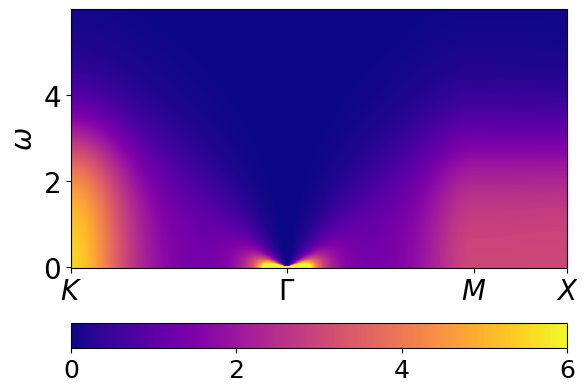

In [17]:

l=Lattice.TriangLattice(10,False,'FMAC')
T=1.0

fig,ax=plt.subplots(1,1)
SS=StructureFactor.StructureFac_fit_F(T)
Nt_points, Nomegs=400,200 
omeg_max=6
kpath=l.High_symmetry_path(Nt_points)

##geneerating arrays for imshow of momentum cut
omegas=np.linspace(0.0001,omeg_max ,Nomegs)
t=np.arange(0,len(kpath),1)
t_m,omegas_m=np.meshgrid(t,omegas)
SSSfw=SS.Dynamical_SF(kpath[t_m,0],kpath[t_m,1],omegas_m)
im=ax.imshow(SSSfw, vmax=6 ,origin='lower', aspect='auto', cmap='plasma')
Npl_x=l.High_symmetry_bounds( Nt_points)
Nty=4
Npl_y=np.linspace(0,Nomegs,Nty)
ax.set_xticks(Npl_x,[r'$K$',r'$\Gamma$',r'$M$',r'$X$'], size=20)
ax.set_yticks([Npl_y[0],Npl_y[1],Npl_y[2]],['0','2','4'], size=20)
ax.set_ylabel(r"$\omega$", size=20)

cbar=fig.colorbar(im, ax=ax, location='bottom',orientation="horizontal", pad = 0.15, ticks=[0,2,4,6])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xticklabels(['0', '2', '4', '6'])  # vertically oriented colorbar